<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_DeepLearning/blob/main/3_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%B9%84%EC%A0%84%EB%B6%84%EC%95%BC_CNN%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목차

- [4일정도]
- CNN 개요
- CNN을 tensorflow/keras 기반 구현
- CNN을 AutoML 기반 autoKeras로 구현(GPU)
- CNN을 pytorch기반 핵심 부분 구현(토치기본 + 핵심부분구현)
- CNN을 pytorch기반 객체지향스타일로 구현
- 전이학습
- 전이학습 + Yolo + 객체 탐지 구현

# 비전 분야

- 이미지 분류
  - CNN, VGG-16~19, ResNet, SeNet, ....
  - 어느정도 인간의 인지능력을 초월해서 안착한 분야
  - 1개의 이미지(영상)에서 1개의 객체를 탐지/분류
  - opencv를 같이 병행
    - 데이터 구축(전처리 파트), 많은 기능 보유

- 사물인식/위치탐색/ 객체 탐지
  - 사진(영상) 1장 (프레임)에서 n개의 객체를 탐지 분야
  - Yolo, Faster CNN. SSD, ...
  - 자율주행, CCTV 관제, 보안, 등등....

- 스타일 전이(화풍모방) + 생성모델과 결합
  - GAN,  stable diffustion, GPT 제공

- 이미지 창조 + 생성모델과 결합
  - 텍스트(프럼프트) 입력 -=> 해석(NLP) -> 기반으로 이미지를 생성 -> 결과물 전송 : GPT등 LLM의 API 형태로 제공
  
- 기타
  - 안면인식
  - 이미지추천


# 이미지 인식대회(ILSVRC)

https://www.image-net.org/challenges/LSVRC/

  - 한장의 사진에서 한개의 객체를 검출
  - 정확도를 겨루는 대회
  - 2010~17 종료 (캐글로 이관)
- history
  - 2012
    - 8 Layer
    - 논문으로만 존재했던 cnn을 최초로 비전분야에 적용 구현
    - **영상분야에 CNN**을 사용해야한다는 패러다임의 전환, 이전에는 머신러닝으로 수행했음.
    - AlexNet

  - 2014~16
    - google incepytion v2 ~ v3
    - VGG-16~19
    - 이런 모델은 모두 허브에 전이학습 모델로 제공

  -2015
    - 128 layer
    - 깊이가 깊어지면 성능이 좋아진다? 한계를 극복
    - ResNet (숏컷추가)
      - 알파고 -> 알파고제로(바둑AI챔피언) -> 알파제로(바둑/장기/체스 3개 통합챔피언)
      - 알파제로에 차용함(강화학습 + 딥러닝)
  -2017
    - 인식 오차율 2.3% 인간의 지성수준을 넘어갔다.
      (인간은 5% 정도)
    - 대회종료


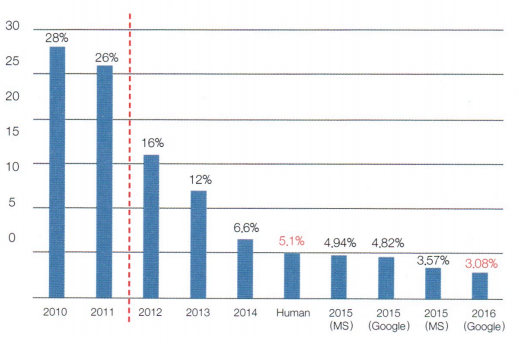

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/cnn/cnn_1.png')
# 딥러닝을 비전분야에 사용한 시점 2012

# CNN 개요

- 사람(동물) 눈에서 사물을 인지하는 절차를 적용하여 만든 네트워크
- 제안한 층
  - 합성곱 인공 신경망
  - Convolution Neural Network(CNN)
- history
  - 1989 : 개념발표, Lecun 논문,
  - 2006 : CNN을 일반화한 논문 -> 구현하게끔 묘사(구체화 되었음)
  - 2012 : 최초 구현, AlexNet


# 인공 신경망 구조
- 단일 퍼셉트론 기반
  - 입력층
  - 출력층
- 다중퍼셉트론 기반 -> ANN
  - 입력층
  - 은닉층
  - 출력층

- DNN
  - 입력층
  - 은닉층(중간층) -> 2개이상 or 4개이상
  - 출력층

- CNN
  - 입력층     : input layer
  - 은닉층     : hidden layer
    L 합성공층 : Convolution layer : 특징추출
    L 풀링층   : pulling layer  : 특징강화
    L ... (반복)
    L 전결합층 : Fully Connected Layer : 차원을 정리해서 정답에 수렴하게 완충지대
  - 출력층

- 특징
  - 이미지내의 공간정보를 특징(피처)로 보고, 추출
  - 합성곱층에서 수행
  - 이미지내에 인접정보(공간과 공간은 이웃하거나 떨어져 있거나...) 를 특징(피처)로 본다.


# 각  층을 샘플 데이터 기반으로 해석

##  데이터
- 손글씨 이미지 데이터

- 데이터 특징
  - 손글씨 이미지 : 0~9 : **다중분류(softmax)** (이중분류-sigmoid)
  - 훈련데이터 : 60000, 테스트 10000
  - 이미지 1개
    - h, w => 28, 28 (pixel 단위)
    - feature = 28 * 28 = 784 (픽셀 1개 데이터 1개)
    - 칼라
      - grayscale 1채널 (흑백, 회색톤)
        - 0~ 255 표현 -> 색상수 256
        - MNIST (양수, 0 ~ 255 분포)
      - rgb 3채널 -> 비용 발생 소지큼
        -  red : 256
        -  green : 256
        -  blue : 256
- 목적
  - 서비스
   손글씨 이미지 입력 -> 모델 예측 3이다: 추론 -> 결과응답
   - 학습
    - 입력한 이미지를 잘 분류할수 있는 가중치와 편향값을 최적으로 구하는 것.
    **(최적 규칙 찾기)**



### 입력층
  - 입력
    - 원본이미지(None, 28*28) : 2D
  - 특징
    - 원본의 크기가 다르면 => 보정(크기)
      - 재료 데이터의 크기가 모두 상이하면 크기를 보정
    - 큰 이미지의 특정부분 정보를 사용
      - 라벨링 수행
      - 외부툴, opencv,.....
    - 데이터표현기법 (엔진별로 상이함)
      - NHWC ( 개수, 높이, 너비, 채널수 )
        - channel last
        - 텐서플로우 / 케라스
        - (-1, 28, 28, 1)
      - NCHWJ( 개수, 채널수, 높이, 너비 )
        - channel first
        - 파이토치
        - (-1, 1, 28, 28)
  - 출력
    - 텐서플로우 / 케라스
    - (-1 or None, 28, 28, 1) : 4D



### 은닉층


#### 합성곱층
  

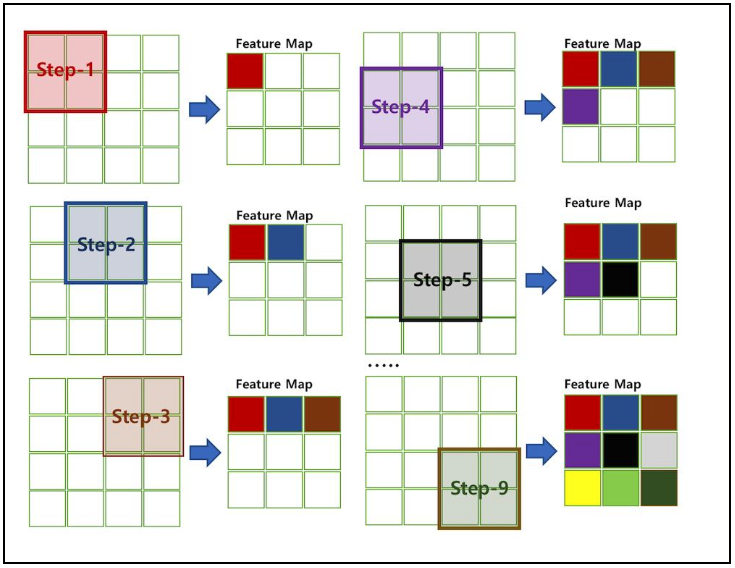

In [ ]:
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/cnn/cnn_3.png')
  # 커널(필터가) 원본 이미지 상을 Z자 형태로 슬라이딩(스트라이드 양만큼)하면서
  # 특징을 추출하여(행렬의곱) 모든 결과는  feature map에 모인다.(연산결과)

  # 이동하다보면 화면을 넘어서거나, 부족해서 이동이 힘든 경우가 발생함
  # 보정이 필요함, 패딩(padding) -> 아래그림참고

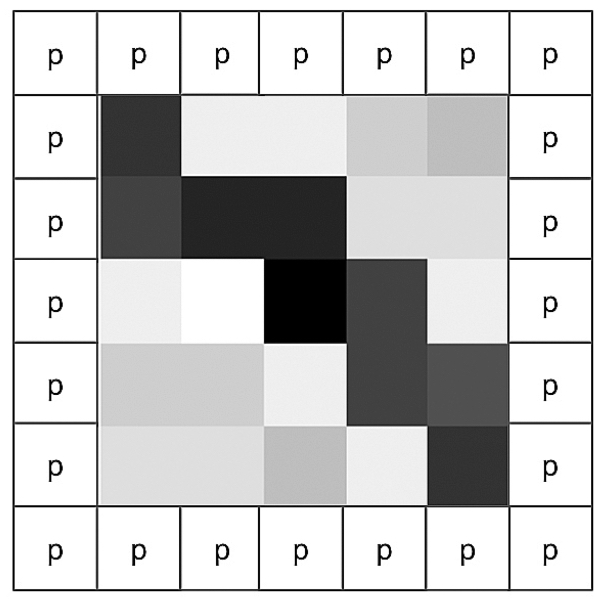

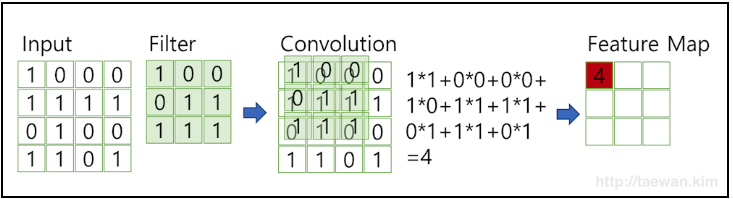

In [ ]:
# 특징 추출 ( 필터 * 원본이미지가 겹치는 구간에 연산) => 대표값 추출(행렬곱)
# 1채널 기준 표현
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/cnn/cnn_4.png')

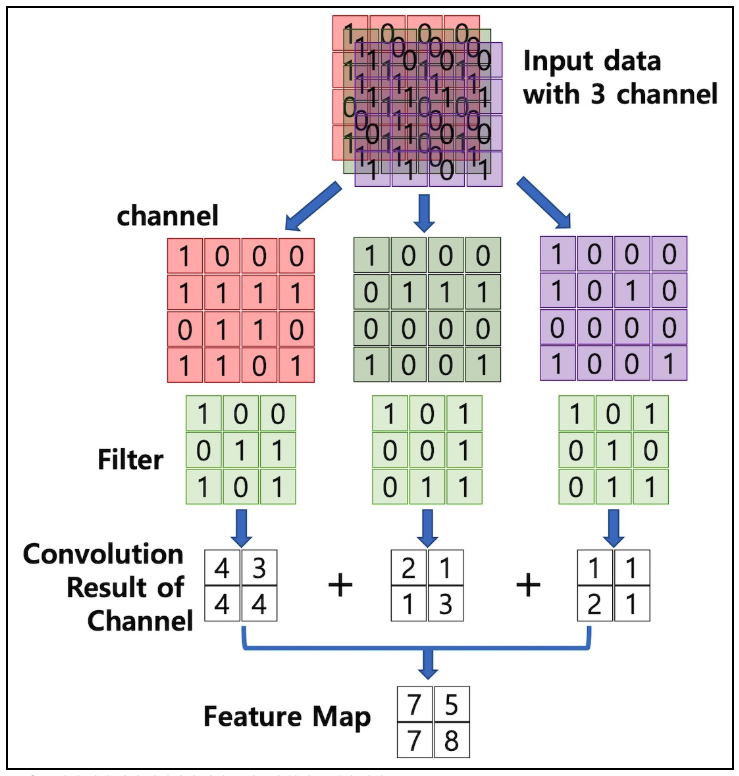

In [ ]:
# 3채널 기준 표현
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/cnn/cnn_5.png')

####
  - 입력
    - stride : 이동사이즈
    - 이전층의 출력
    - (None or -1, 28, 28, 1)

  - 특징
    - 그림 요약
      - 원본 이미지 위에 커널(필터:높이/ 너비 특정크기를 가짐, 특정값도 가짐, 정방형크기를 가진 행렬)이 존재
      - 커널은 이동 (이동량:스트라이드, 왼-> 오, 위 -> 아래) 하면서
      - 커널과 원본이 겹치는 구간에서 행렬곱 수행
      - 이를 통해서 겹치는 구간의 대표값 (공간정보)를 추출 : feature
      - 이 값들을 모으면  feature map
    - 커널(kernal)
      - 정방 행렬
      - 특정값을 가짐
          - W(weight)
          - W는 순전파/역전파를 통해서 갱신된다(최적화된다)
          - **가중치 W를 파라미터로 가진 커널**
      - 편향(bias)
        - y = wx + b
        - 학습을 통해 갱신됨
      - 스트라이드(stride)
        - 커널이 이미지상을 슬라이딩할 때 이동하는 양
        - 통상, 수평/ 수직량은 동일하게 적용
      - 패딩(padding)
        - 보정 : 커널이 이동중 불가피하게 끝까지 못간다면 패딩을 통해서 이동가능하게 보정할 수 있다.
        - 종류
          - SAME : 원본과 feature맵이 동일크기가 되게 보정
          - VALID : 유효범위만 특징을 추출해라 => feature 맵이 통상 작아진다.
      - 커널, 스트라이드, 패딩간에서 feature맵 크기에 대한 공식이 존재
  - 출력
    - feature map or activation map
    - activation map
      - feature map을 활성화 함수를 통과시키면 activation map이라고 부른다.
      - 종류
        -sigmoid, **relu**, softmax
      - 목적
        - 선형구조 -> 비선형(깊이감을 늘릴 수 있다)
        - 특징 추출 관련
        - 정규화 등 처리 관련
        


  #### 풀링층
  - 입력
    - 4D (-1 ,?, ? ,?)
  - 특징
    - 특징을 강화한다.
    - 종류
      - 최대풀링 -> 구역값의 최대값 -> 대표
      - 평균풀링 -> 구역값의 평균값 -> 대표
      - 연산이 확정되어 있음 -> 가중치값X, 커널크기만 필요
      - kernel(size), stride, padding, bias
  - 출력
    - 4D (-1 ,?, ? ,?)

#### 드롭아웃층
- 설계상 과적합 방지를 위해서 Dropout 층을 삽입할 수 있다.
  - 학습 방해(특정 비율 지정)
  - 신경을 끊어버린다.
- CNN 기본이 아니고, 컨셉상 추가할 수 있는 층



  #### 전결합층
  - 입력
    - feature(or activation) map
    - 4D (-1, ?, ?, ?)

  - 특징
    - 최종 결과(출력층)에 수렴하기 위해서, 중간층 혹은 완충지 역할 등등 담당
    - 정보 손실을 최소화 정도 수치 설정
    - Flatten 처리 (4D -> 2D), 피처수로 조정
  - 출력
    - 2D (-1, ?)



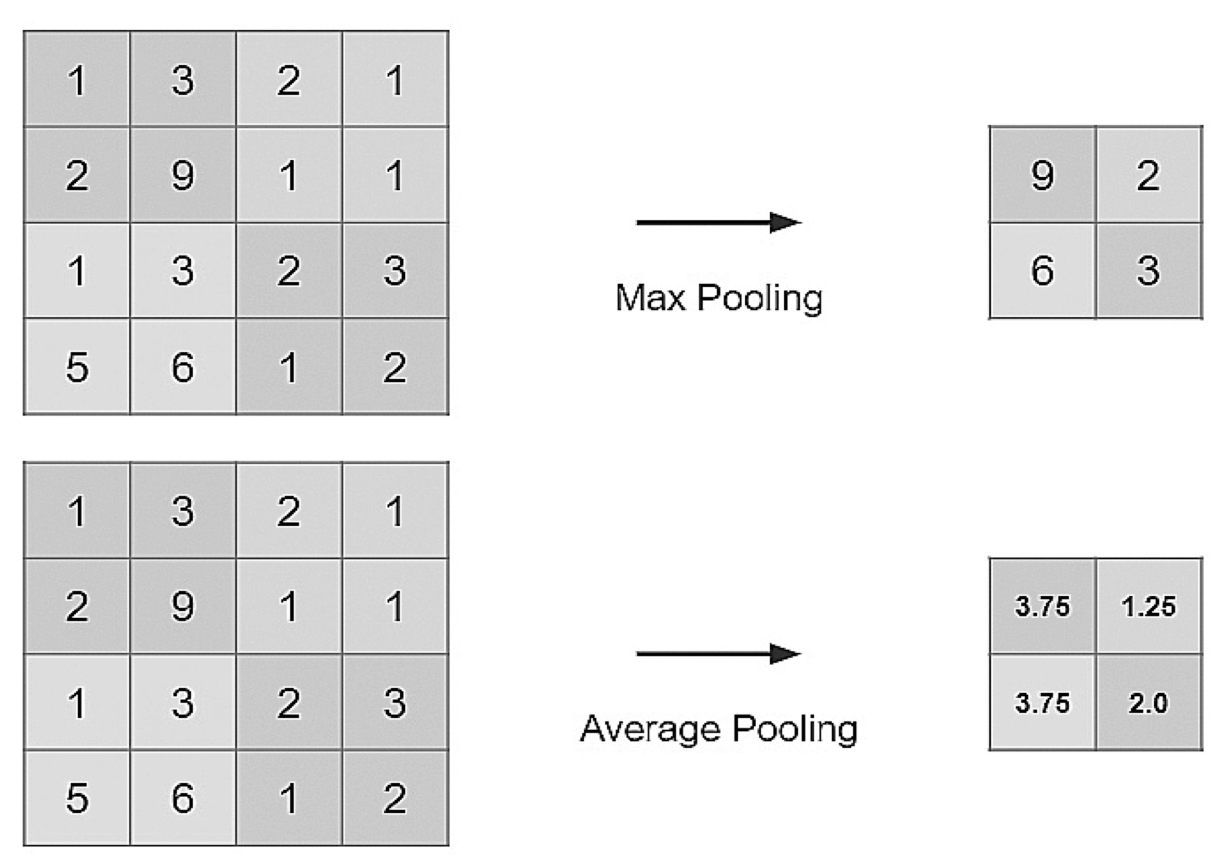



### 출력층
- 입력
  - 2D (-1, ?)
- 특징
  - 다중분류 : softmax() 통과 -> 확률
  - 이진분류 : sigmoid() 통과 -> 확률
- 출력
  - 2D (-1, 10)
  - 손글씨 0~ 9 에 대한 각각 확률값이 세팅
    - 이 중에 가장 높은 값의 인덱스(argnax) -> 예측값 추론